In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

In [4]:
#check type of the train and test
type(xtrain)

numpy.ndarray

In [5]:
#check shape of the train and test
xtrain.shape

(50000, 32, 32, 3)

In [6]:
#Look a first image in array
xtrain[10] #0 to 255

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

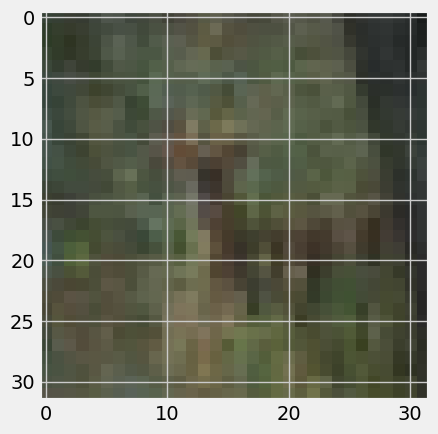

In [7]:
img0=plt.imshow(xtrain[10])

In [8]:
#get image label
label=ytrain[10]
print(label)

[4]


In [9]:
classification= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
print("image class is:",classification[ytrain[10][0]])

image class is: deer


In [11]:
#change the label into set of number[10]
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [12]:
ytrain_one_hot.shape

(50000, 10)

In [13]:
#normalize the pixels values
xtrain=xtrain/255
xtest=xtest/255

In [14]:
xtrain[10]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [15]:
xtrain.shape

(50000, 32, 32, 3)

In [16]:
# Model with Batch Normalization
model = Sequential()

model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(64,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(128,(4,4),input_shape=(32,32,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        3136      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       1

In [18]:
model.fit(xtrain,ytrain_one_hot,epochs=50,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 197s 5ms/sample - loss: 1.6878 - acc: 0.4274 - val_loss: 1.4785 - val_acc: 0.4933
Epoch 2/50
40000/40000 [==============================] - 193s 5ms/sample - loss: 1.0451 - acc: 0.6316 - val_loss: 1.0326 - val_acc: 0.6401
Epoch 3/50
40000/40000 [==============================] - 188s 5ms/sample - loss: 0.8516 - acc: 0.7052 - val_loss: 1.1160 - val_acc: 0.6366
Epoch 4/50
40000/40000 [==============================] - 184s 5ms/sample - loss: 0.7197 - acc: 0.7500 - val_loss: 0.7141 - val_acc: 0.7538
Epoch 5/50
40000/40000 [==============================] - 206s 5ms/sample - loss: 0.6403 - acc: 0.7813 - val_loss: 0.5952 - val_acc: 0.7942
Epoch 6/50
40000/40000 [==============================] - 190s 5ms/sample - loss: 0.5567 - acc: 0.8106 - val_loss: 0.5735 - val_acc: 0.8013
Epoch 7/50
40000/40000 [==============================] - 196s 5ms/sample - loss: 0.4881 - acc: 0.8322 - val_l

In [19]:
model.evaluate(xtest,ytest_one_hot)

10000/10000 [==============================] - 13s 1ms/sample - loss: 0.6907 - acc: 0.8528


[0.690726110470295, 0.8528]

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

y_predict = model.predict_classes(xtest)
cm=confusion_matrix(ytest,y_predict)

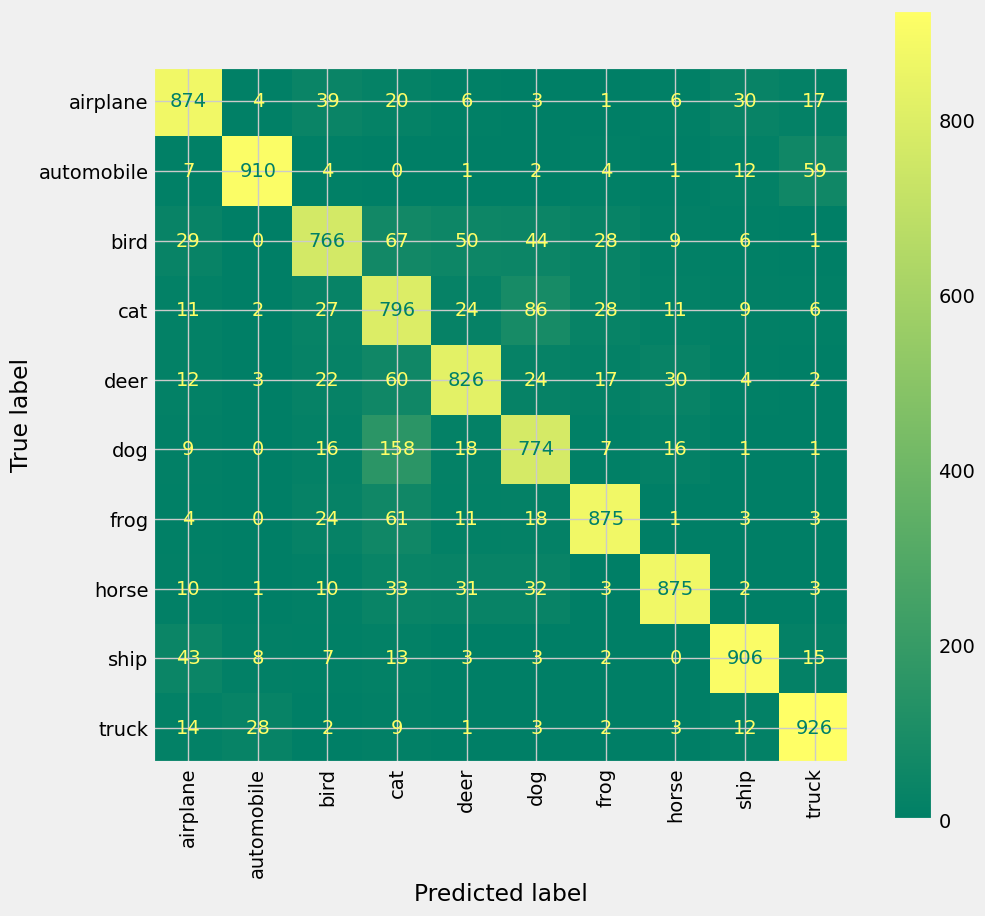

In [95]:
from sklearn.metrics import ConfusionMatrixDisplay

display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classification)

#Note:Fill all variables here with default values of the plot_confusion _matrix

fig,ax=plt.subplots(figsize=(10,10))
disp=display.plot(xticks_rotation="vertical",ax=ax,cmap="summer")

plt.show()

In [96]:
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.95      0.91      0.93      1000
           2       0.84      0.77      0.80      1000
           3       0.65      0.80      0.72      1000
           4       0.85      0.83      0.84      1000
           5       0.78      0.77      0.78      1000
           6       0.90      0.88      0.89      1000
           7       0.92      0.88      0.90      1000
           8       0.92      0.91      0.91      1000
           9       0.90      0.93      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



In [64]:
#model.save("CNN.h5")

In [65]:
# from tensorflow.keras.models import load_model
# model_1=load_model("CNN.h5")

In [100]:
model.predict(xtest)

array([[2.2980667e-07, 2.0115650e-08, 1.6217335e-07, ..., 7.0792446e-08,
        2.7220884e-07, 7.6070048e-09],
       [4.4157775e-10, 7.4206019e-07, 3.4256381e-13, ..., 1.8616791e-13,
        9.9999928e-01, 3.4832126e-10],
       [4.2562780e-07, 9.0141228e-04, 1.3590486e-08, ..., 4.5257602e-07,
        9.9908817e-01, 6.0753791e-07],
       ...,
       [8.4272877e-13, 4.2211880e-14, 6.0426014e-10, ..., 4.6156326e-10,
        2.1165959e-10, 2.2421631e-12],
       [3.8312704e-04, 9.9960887e-01, 1.9990041e-06, ..., 1.6586524e-06,
        7.1754052e-08, 3.6574855e-07],
       [3.7570242e-11, 5.5176236e-10, 2.6396652e-10, ..., 9.9999988e-01,
        7.5090732e-12, 7.0238509e-11]], dtype=float32)

In [180]:
dog=plt.imread(r"C:\Users\ShibuKumar\Downloads\Dog\4.jpg")

(288, 300, 3)

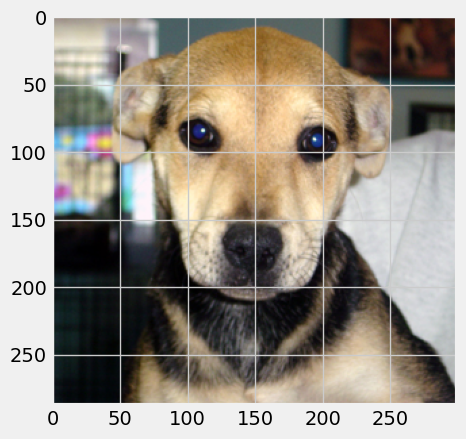

In [181]:
img=plt.imshow(dog)
dog.shape

In [182]:
#resize the image
from skimage import transform
resize=transform.resize(dog,(32,32,3))

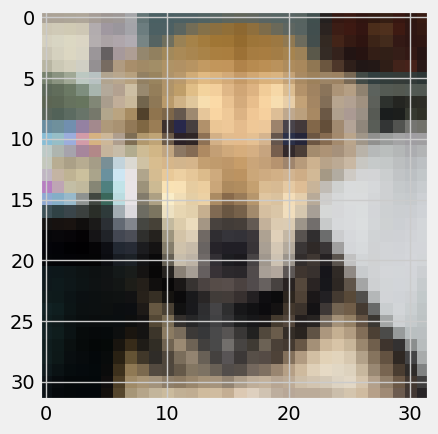

In [183]:
img=plt.imshow(resize)

In [184]:
prediction=model.predict(np.array([resize]))
print(prediction)

[[8.7582031e-08 2.3933604e-09 8.0610612e-08 2.4499554e-05 3.2271839e-07
  9.9995506e-01 7.9779174e-06 1.1986355e-05 3.9935447e-08 3.0264896e-08]]


In [185]:
np.argmax(prediction,axis=-1)

array([5], dtype=int64)

In [186]:
classification[5]

'dog'

In [109]:
model.save("CNN_Model-cifar10.h5")